# 以 2D高斯分布的数据为例, 运行mcmc

## 生成二维高斯数据，定义似然和后验

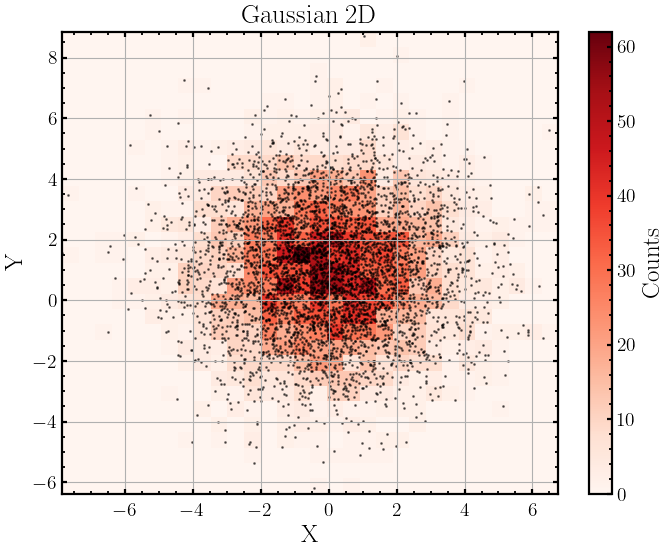

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
plt.style.use('/Users/sara/PycharmProjects/PonGrid/pongrid/data/mystyle.mplstyle')

# 生成二维正态分布数据
np.random.seed(42)
mu1, mu2 = 0, 1
sigma1, sigma2 = 2, 2
mu_true = [mu1, mu2]  # 真实均值
cov_true = [[sigma1**2, 0], [0, sigma2**2]]  # 真实协方差矩阵
data = np.random.multivariate_normal(mu_true, cov_true, size=5000)

# draw gaussian2D data
x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=30, cmap='Reds')
plt.colorbar(label='Counts')
plt.scatter(x, y, s=1, color='k', alpha=0.5)
plt.title('Gaussian 2D')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.savefig('ex_data_gaussian2D.png')
plt.show()

In [2]:
# 定义 log likelihood 函数
def log_likelihood(theta, data):
    mu1, mu2, sigma1, sigma2 = theta
    cov = [[sigma1**2, 0], [0, sigma2**2]]
    return np.sum(multivariate_normal.logpdf(data, mean=[mu1, mu2], cov=cov))

# 定义 prior 函数
def log_prior(theta):
    mu1, mu2, sigma1, sigma2 = theta
    if sigma1 > 0 and sigma2 > 0:
        return 0.0
    return -np.inf

# 定义 log posterior 函数
def log_posterior(theta, data):
    return log_prior(theta) + log_likelihood(theta, data)

## 利用采样器进行最佳拟合

In [3]:
import emcee

# 使用 emcee 进行采样
ndim = 4  # 参数维度
nwalkers = 32  # 行走者数量
nsteps = 5000  # 步数

# 初始化行走者的起始位置
p0 = np.random.rand(nwalkers, ndim)

# 创建采样器
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
sampler.run_mcmc(p0, nsteps, progress=True)

100%|██████████| 5000/5000 [00:17<00:00, 289.34it/s]


State([[-1.53700386e-02  9.65501249e-01  2.04087471e+00  2.00610774e+00]
 [ 6.94648998e-03  9.68727439e-01  1.97242583e+00  2.02903066e+00]
 [ 2.99881221e-03  1.03319441e+00  1.99979113e+00  2.02057527e+00]
 [-8.55367110e-03  9.98827101e-01  2.01364785e+00  2.01283510e+00]
 [-2.90385594e-02  1.01692575e+00  2.03179338e+00  2.02087540e+00]
 [ 1.51494131e-02  9.58584639e-01  2.01776180e+00  2.01397830e+00]
 [-1.74232661e-02  9.94756985e-01  2.01839597e+00  1.98188690e+00]
 [-2.27613951e-02  9.43554920e-01  2.01351303e+00  2.02186597e+00]
 [-4.65802799e-02  1.01305485e+00  2.00324513e+00  1.99252513e+00]
 [-1.34374616e-02  9.63849659e-01  1.97541939e+00  1.99089615e+00]
 [-1.26660537e-03  9.80319735e-01  2.00319384e+00  1.98646929e+00]
 [ 1.10647789e-02  9.94301196e-01  2.00419441e+00  1.98786528e+00]
 [-7.36800547e-03  9.73246225e-01  1.98681687e+00  2.03130439e+00]
 [-1.31726062e-02  1.01221479e+00  1.98376647e+00  2.00329909e+00]
 [-3.62466939e-02  9.26509218e-01  2.01900889e+00  2.015

## 拟合结果

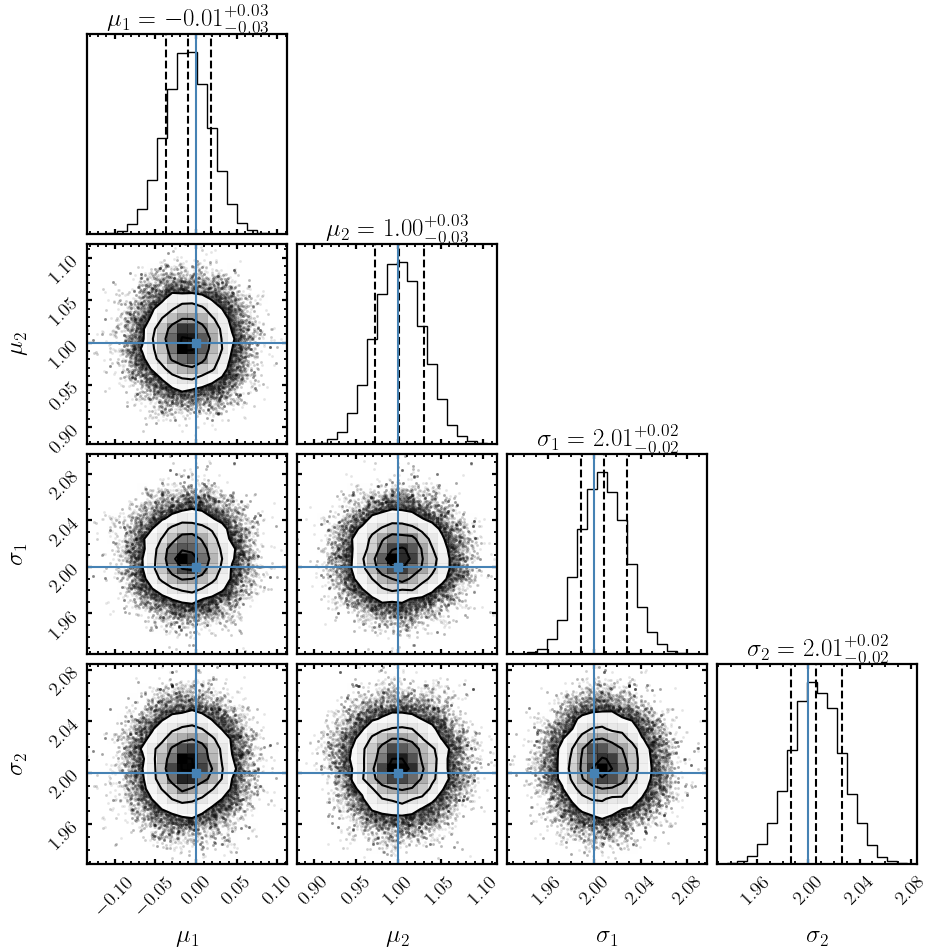

In [4]:
import corner

samples= sampler.get_chain(flat=True, discard=2000)
fig = corner.corner(
    samples, 
    truths=[mu1, mu2, sigma1, sigma2],
    labels=['$\mu_1$', '$\mu_2$', '$\sigma_1$', '$\sigma_2$'],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={'fontsize': 18},
    # title_fmt='.2f'
)
fig.savefig('ex_mcmc_gaussian2D.png')